<a href="https://colab.research.google.com/github/Charishma015/Product-Recommendation-System-for-Ecommerce-website/blob/main/Product_Recommendation_System_for_E_Commerce_Website.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Importing libraries

In [113]:
# Import necessary libraries for data handling, visualization, and recommendation system modeling
import numpy as np              # For numerical computations
import pandas as pd             # For data manipulation and analysis
import matplotlib.pyplot as plt # For plotting
import seaborn as sns           # For data visualization
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split
from sklearn.neighbors import NearestNeighbors
from scipy.sparse import csr_matrix
from scipy.sparse.linalg import svds
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline


# 2. Dataset

In [114]:
# Load the Electronics ratings dataset with defined headers for easy identification of columns
electronics_df = pd.read_csv('ratings_Electronics.csv', names=['userId', 'productId', 'ratings', 'timestamp'])


In [70]:
electronics_df.head()

,userId,productId,ratings,timestamp
0,AKM1MP6P0OYPR,0132793040,5.0,1365811200
1,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
2,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
3,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
4,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200


from matplotlib import pyplot as plt
_df_0['ratings'].plot(kind='hist', bins=20, title='ratings')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['timestamp'].plot(kind='hist', bins=20, title='timestamp')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_2.groupby('userId').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_3.groupby('productId').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='ratings', y='timestamp', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['timestamp']
  ys = series['ratings']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_5.sort_values('timestamp', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('userId')):
  _plot_series(series, series_name, i)
  fig.legend(title='userId', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('timestamp')
_ = plt.ylabel('ratings')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['timestamp']
  ys = series['ratings']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_6.sort_values('timestamp', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('productId')):
  _plot_series(series, series_name, i)
  fig.legend(title='productId', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('timestamp')
_ = plt.ylabel('ratings')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['timestamp']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'timestamp'}, axis=1)
              .sort_values('timestamp', ascending=True))
  xs = counted['timestamp']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_7.sort_values('timestamp', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('userId')):
  _plot_series(series, series_name, i)
  fig.legend(title='userId', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('timestamp')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['timestamp']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'timestamp'}, axis=1)
              .sort_values('timestamp', ascending=True))
  xs = counted['timestamp']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('timestamp', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('productId')):
  _plot_series(series, series_name, i)
  fig.legend(title='productId', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('timestamp')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_9['ratings'].plot(kind='line', figsize=(8, 4), title='ratings')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['timestamp'].plot(kind='line', figsize=(8, 4), title='timestamp')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['productId'].value_counts()
    for x_label, grp in _df_11.groupby('userId')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('userId')
_ = plt.ylabel('productId')

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_12['userId'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_12, x='ratings', y='userId', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_13['productId'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_13, x='ratings', y='productId', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_14['userId'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_14, x='timestamp', y='userId', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_15['productId'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_15, x='timestamp', y='productId', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

#### Timestamp column

In [71]:
# Display the initial rows to understand the dataset structure
electronics_df.head()

# Removing the timestamp as it's unnecessary for recommendation purposes
electronics_df.drop('timestamp', axis=1, inplace=True)

,userId,productId,ratings,timestamp
0,AKM1MP6P0OYPR,0132793040,5.0,1365811200
1,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
2,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
3,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
4,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200


from matplotlib import pyplot as plt
_df_16['ratings'].plot(kind='hist', bins=20, title='ratings')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_17['timestamp'].plot(kind='hist', bins=20, title='timestamp')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_18.groupby('userId').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_19.groupby('productId').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_20.plot(kind='scatter', x='ratings', y='timestamp', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['timestamp']
  ys = series['ratings']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_21.sort_values('timestamp', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('userId')):
  _plot_series(series, series_name, i)
  fig.legend(title='userId', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('timestamp')
_ = plt.ylabel('ratings')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['timestamp']
  ys = series['ratings']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_22.sort_values('timestamp', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('productId')):
  _plot_series(series, series_name, i)
  fig.legend(title='productId', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('timestamp')
_ = plt.ylabel('ratings')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['timestamp']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'timestamp'}, axis=1)
              .sort_values('timestamp', ascending=True))
  xs = counted['timestamp']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_23.sort_values('timestamp', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('userId')):
  _plot_series(series, series_name, i)
  fig.legend(title='userId', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('timestamp')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['timestamp']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'timestamp'}, axis=1)
              .sort_values('timestamp', ascending=True))
  xs = counted['timestamp']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_24.sort_values('timestamp', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('productId')):
  _plot_series(series, series_name, i)
  fig.legend(title='productId', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('timestamp')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_25['ratings'].plot(kind='line', figsize=(8, 4), title='ratings')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_26['timestamp'].plot(kind='line', figsize=(8, 4), title='timestamp')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['productId'].value_counts()
    for x_label, grp in _df_27.groupby('userId')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('userId')
_ = plt.ylabel('productId')

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_28['userId'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_28, x='ratings', y='userId', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_29['productId'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_29, x='ratings', y='productId', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_30['userId'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_30, x='timestamp', y='userId', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_31['productId'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_31, x='timestamp', y='productId', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [72]:
electronics_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7824482 entries, 0 to 7824481
Data columns (total 3 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     object 
 1   productId  object 
 2   ratings    float64
dtypes: float64(1), object(2)
memory usage: 179.1+ MB


In [73]:
# Checking the dataset dimensions and data types
print(f"Dataset has {electronics_df.shape[0]} rows and {electronics_df.shape[1]} columns.")
print(f"Data types:\n{electronics_df.dtypes}")

# Extracting a subset of the dataset for faster computation and reduced sparsity
electronics_df1 = electronics_df.iloc[:50000, :]
electronics_df1.info()


Dataset has 7824482 rows and 3 columns.
Data types:
userId        object
productId     object
ratings      float64
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   userId     50000 non-null  object 
 1   productId  50000 non-null  object 
 2   ratings    50000 non-null  float64
dtypes: float64(1), object(2)
memory usage: 1.1+ MB


In [74]:
#Check the datatypes
electronics_df.dtypes

,0
userId,object
productId,object
ratings,float64


In [75]:
#Taking subset of the dataset
electronics_df1=electronics_df.iloc[:50000,0:]

In [76]:
electronics_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   userId     50000 non-null  object 
 1   productId  50000 non-null  object 
 2   ratings    50000 non-null  float64
dtypes: float64(1), object(2)
memory usage: 1.1+ MB


In [77]:
#Summary statistics of rating variable
electronics_df1['ratings'].describe().transpose()

,ratings
count,50000.00000
mean,4.03524
std,1.35555
min,1.00000
25%,4.00000
50%,5.00000
75%,5.00000
max,5.00000


In [78]:
#Find the minimum and maximum ratings
print('Minimum rating is: %d' %(electronics_df1.ratings.min()))
print('Maximum rating is: %d' %(electronics_df1.ratings.max()))

Minimum rating is: 1
Maximum rating is: 5


* Rating are on the scale 1 to 5.

# Handling Missing values

In [16]:
#Check for missing values
print('Number of missing values across columns: \n',electronics_df.isnull().sum())

Number of missing values across columns: 
 userId       0
productId    0
ratings      0
dtype: int64


## Ratings

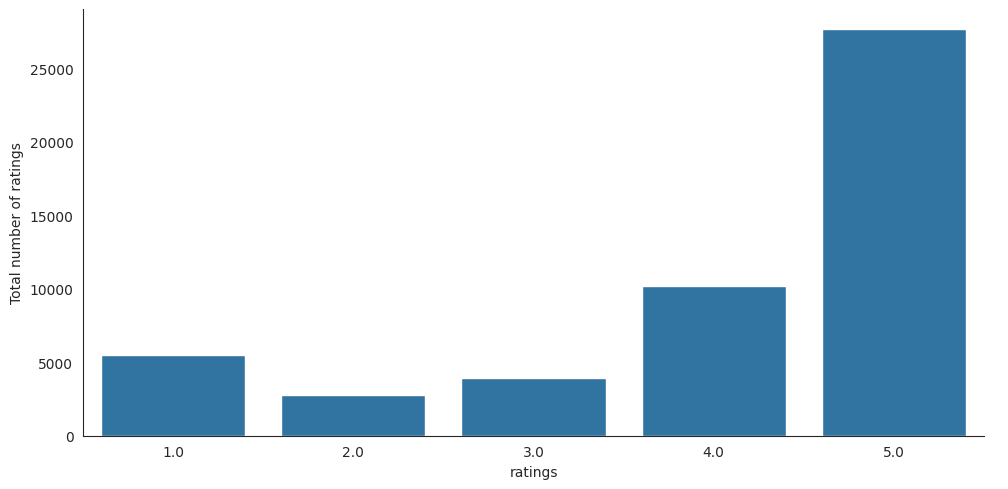

In [79]:
# Check the distribution of the rating
with sns.axes_style('white'):
    g = sns.catplot(x="ratings", data=electronics_df1, aspect=2.0, kind='count')
    g.set_ylabels("Total number of ratings")

## Products and Users

In [18]:
# Number of unique user id  in the data
print('Number of unique users in Raw data = ', electronics_df1['userId'].nunique())
# Number of unique product id  in the data
print('Number of unique product in Raw data = ', electronics_df1['productId'].nunique())

Number of unique users in Raw data =  46554
Number of unique product in Raw data =  3446


# 3. Taking the subset of dataset to make it less sparse/ denser.

In [80]:
#Check the top 10 users based on ratings
most_rated=electronics_df1.groupby('userId').size().sort_values(ascending=False)[:10]
print('Top 10 users based on ratings: \n',most_rated)

Top 10 users based on ratings: 
 userId
A231WM2Z2JL0U3    37
AY8Q1X7G96HV5     31
ALUNVOQRXOZIA     20
A1NVD0TKNS1GT5    19
A243HY69GIAHFI    18
A1RPTVW5VEOSI     17
A1ISUNUWG0K02V    16
A1MJMYLRTZ76ZX    16
A7Y6AVS576M03     15
A3MEIR72XKQY88    15
dtype: int64


In [81]:
counts=electronics_df1.userId.value_counts()
electronics_df1_final=electronics_df1[electronics_df1.userId.isin(counts[counts>=15].index)]
print('Number of users who have rated 25 or more items =', len(electronics_df1_final))
print('Number of unique users in the final data = ', electronics_df1_final['userId'].nunique())
print('Number of unique products in the final data = ', electronics_df1_final['userId'].nunique())

Number of users who have rated 25 or more items = 219
Number of unique users in the final data =  11
Number of unique products in the final data =  11


* electronics_df1_final has the users who have rated 25 or more items.

## Ratings analysis

In [82]:
#constructing the pivot table
final_ratings_matrix = electronics_df1_final.pivot(index = 'userId', columns ='productId', values = 'ratings').fillna(0)
final_ratings_matrix.head()

productId,1400599997,B00000DM9M,B00000J061,B00000J08C,B00000J0A2,B00000J0E8,B00000J1QZ,B00000J1US,B00000J3H5,B00000J3HB,...,B00004TDWY,B00004TE75,B00004TEN2,B00004TH2W,B00004TH2Y,B00004THCX,B00004THCY,B00004THCZ,B00004THDE,B00004THM6
userId,,,,,,,,,,,,,,,,,,,,,
A1ISUNUWG0K02V,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,5.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A1MJMYLRTZ76ZX,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A1NVD0TKNS1GT5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A1RPTVW5VEOSI,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0
A231WM2Z2JL0U3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,...,0.0,5.0,5.0,0.0,4.0,0.0,0.0,0.0,5.0,0.0


* It shows that it is a sparse matrix. So, many cells are filled with 0 values.

In [22]:
print('Shape of final_ratings_matrix: ', final_ratings_matrix.shape)

Shape of final_ratings_matrix:  (11, 186)


* We can see that there are 7 products and 236 users.

In [83]:
#Calucating the density of the rating marix
given_num_of_ratings = np.count_nonzero(final_ratings_matrix)
print('given_num_of_ratings = ', given_num_of_ratings)
possible_num_of_ratings = final_ratings_matrix.shape[0] * final_ratings_matrix.shape[1]
print('possible_num_of_ratings = ', possible_num_of_ratings)
density = (given_num_of_ratings/possible_num_of_ratings)
density *= 100
print ('density: {:4.2f}%'.format(density))

given_num_of_ratings =  219
possible_num_of_ratings =  2046
density: 10.70%


* The density value of the matrix also shows that it is a sparse matrix.

# 4. Splitting the data

In [84]:
#Split the data randomnly into train and test datasets into 70:30 ratio
train_data, test_data = train_test_split(electronics_df1_final, test_size = 0.3, random_state=0)
train_data.head()

,userId,productId,ratings
17509,AY8Q1X7G96HV5,B00000JSES,4.0
11968,A243HY69GIAHFI,B00000J3Q7,3.0
35533,A1RPTVW5VEOSI,B00003WGP5,5.0
31480,A1NVD0TKNS1GT5,B00002JXFH,4.0
13526,A23ZO1BVFFLGHO,B00000J570,5.0


In [85]:
print('Shape of training data: ',train_data.shape)
print('Shape of testing data: ',test_data.shape)

Shape of training data:  (153, 3)
Shape of testing data:  (66, 3)


# 5. Building Popularity Recommder model

In [86]:
#Count of user_id for each unique product as recommendation score
train_data_grouped = train_data.groupby('productId').agg({'userId': 'count'}).reset_index()
train_data_grouped.rename(columns = {'userId': 'score'},inplace=True)
train_data_grouped.head(40)

,productId,score
0,1400599997,1
1,B00000DM9M,1
2,B00000J061,1
3,B00000J08C,1
4,B00000J1QZ,1
5,B00000J3HB,1
6,B00000J3II,2
7,B00000J3Q7,1
8,B00000J3T1,1
9,B00000J47A,1


In [87]:
#Sort the products on recommendation score
train_data_sort = train_data_grouped.sort_values(['score', 'productId'], ascending = [0,1])

#Generate a recommendation rank based upon score
train_data_sort['rank'] = train_data_sort['score'].rank(ascending=0, method='first')

#Get the top 5 recommendations
popularity_recommendations = train_data_sort.head(5)
popularity_recommendations

,productId,score,rank
87,B00004RC2D,4,1.0
57,B00002SWHH,3,2.0
99,B00004SC3Y,3,3.0
100,B00004SCKA,3,4.0
6,B00000J3II,2,5.0


In [88]:
# Use popularity based recommender model to make predictions
def recommend(user_id):
    user_recommendations = popularity_recommendations

    #Add user_id column for which the recommendations are being generated
    user_recommendations['userId'] = user_id

    #Bring user_id column to the front
    cols = user_recommendations.columns.tolist()
    cols = cols[-1:] + cols[:-1]
    user_recommendations = user_recommendations[cols]

    return user_recommendations

In [89]:
find_recom = [10,100,150]   # This list is user choice.
for i in find_recom:
    print("The list of recommendations for the userId: %d\n" %(i))
    print(recommend(i))
    print("\n")

The list of recommendations for the userId: 10

     userId   productId  score  rank
87       10  B00004RC2D      4   1.0
57       10  B00002SWHH      3   2.0
99       10  B00004SC3Y      3   3.0
100      10  B00004SCKA      3   4.0
6        10  B00000J3II      2   5.0


The list of recommendations for the userId: 100

     userId   productId  score  rank
87      100  B00004RC2D      4   1.0
57      100  B00002SWHH      3   2.0
99      100  B00004SC3Y      3   3.0
100     100  B00004SCKA      3   4.0
6       100  B00000J3II      2   5.0


The list of recommendations for the userId: 150

     userId   productId  score  rank
87      150  B00004RC2D      4   1.0
57      150  B00002SWHH      3   2.0
99      150  B00004SC3Y      3   3.0
100     150  B00004SCKA      3   4.0
6       150  B00000J3II      2   5.0




# 6. Building Collaborative Filtering recommender model.

In [90]:
electronics_df_CF = pd.concat([train_data, test_data]).reset_index()
electronics_df_CF.head()

,index,userId,productId,ratings
0,17509,AY8Q1X7G96HV5,B00000JSES,4.0
1,11968,A243HY69GIAHFI,B00000J3Q7,3.0
2,35533,A1RPTVW5VEOSI,B00003WGP5,5.0
3,31480,A1NVD0TKNS1GT5,B00002JXFH,4.0
4,13526,A23ZO1BVFFLGHO,B00000J570,5.0


## User Based Collaborative Filtering model

In [91]:
# Matrix with row per 'user' and column per 'item'
pivot_df = electronics_df_CF.pivot(index = 'userId', columns ='productId', values = 'ratings').fillna(0)
pivot_df.head()

productId,1400599997,B00000DM9M,B00000J061,B00000J08C,B00000J0A2,B00000J0E8,B00000J1QZ,B00000J1US,B00000J3H5,B00000J3HB,...,B00004TDWY,B00004TE75,B00004TEN2,B00004TH2W,B00004TH2Y,B00004THCX,B00004THCY,B00004THCZ,B00004THDE,B00004THM6
userId,,,,,,,,,,,,,,,,,,,,,
A1ISUNUWG0K02V,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,5.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A1MJMYLRTZ76ZX,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A1NVD0TKNS1GT5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A1RPTVW5VEOSI,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0
A231WM2Z2JL0U3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,...,0.0,5.0,5.0,0.0,4.0,0.0,0.0,0.0,5.0,0.0


In [92]:
print('Shape of the pivot table: ', pivot_df.shape)

Shape of the pivot table:  (11, 186)


In [93]:
#define user index from 0 to 10
pivot_df['user_index'] = np.arange(0, pivot_df.shape[0], 1)
pivot_df.head()

productId,1400599997,B00000DM9M,B00000J061,B00000J08C,B00000J0A2,B00000J0E8,B00000J1QZ,B00000J1US,B00000J3H5,B00000J3HB,...,B00004TE75,B00004TEN2,B00004TH2W,B00004TH2Y,B00004THCX,B00004THCY,B00004THCZ,B00004THDE,B00004THM6,user_index
userId,,,,,,,,,,,,,,,,,,,,,
A1ISUNUWG0K02V,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,5.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
A1MJMYLRTZ76ZX,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
A1NVD0TKNS1GT5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
A1RPTVW5VEOSI,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,3
A231WM2Z2JL0U3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,...,5.0,5.0,0.0,4.0,0.0,0.0,0.0,5.0,0.0,4


In [94]:
pivot_df.set_index(['user_index'], inplace=True)
# Actual ratings given by users
pivot_df.head()

productId,1400599997,B00000DM9M,B00000J061,B00000J08C,B00000J0A2,B00000J0E8,B00000J1QZ,B00000J1US,B00000J3H5,B00000J3HB,...,B00004TDWY,B00004TE75,B00004TEN2,B00004TH2W,B00004TH2Y,B00004THCX,B00004THCY,B00004THCZ,B00004THDE,B00004THM6
user_index,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,5.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,...,0.0,5.0,5.0,0.0,4.0,0.0,0.0,0.0,5.0,0.0


* As this is a sparse matrix we will use SVD.

### Singular Value Decomposition

In [95]:

# Convert to sparse matrix
pivot_sparse = csr_matrix(pivot_df.values)

# Perform SVD
U, sigma, Vt = svds(pivot_sparse, k=10)

In [96]:
print('Left singular matrix: \n',U)

Left singular matrix: 
 [[ 2.65871898e-01  8.28788249e-01 -1.14160900e-01  2.15685919e-01
  -2.65928896e-04  4.93636653e-02  1.66297884e-01  3.12732051e-01
  -1.53122256e-01 -1.38465143e-01]
 [ 5.53711304e-02  1.21204397e-01  8.17836609e-02 -3.29682359e-01
  -1.47955175e-01  8.18019500e-01 -2.13209931e-01 -2.76257471e-01
  -2.09061119e-01 -1.01498819e-01]
 [ 5.46679471e-01 -1.37512688e-01 -2.79596983e-02 -1.45212122e-01
  -3.57798248e-02 -1.89642626e-01 -6.60636300e-01  2.07100247e-01
   3.59790632e-02 -1.23044532e-01]
 [ 4.63168744e-02  5.39880164e-02  8.32935752e-01 -1.36292972e-01
   1.12974956e-02 -9.74799278e-02 -5.43326589e-02  2.99913518e-01
  -1.00398248e-01 -1.16155900e-01]
 [-4.82857184e-02 -5.06969281e-03 -6.10478781e-02 -7.63553438e-02
   8.79528911e-02 -1.33412578e-01  9.24837886e-02 -2.48586367e-01
   1.79064339e-01 -9.26201600e-01]
 [-1.33072419e-01 -3.30520700e-01  8.58433108e-03  6.82184355e-01
  -3.10981905e-02  4.06414738e-01 -1.22417282e-01  4.14339191e-01
   4.0445

In [97]:
print('Sigma: \n',sigma)

Sigma: 
 [15.65710264 16.05091576 17.43121071 17.74252629 18.18622003 18.83061496
 19.14527912 19.94315139 22.99328895 28.83750492]


* As sigma is not a diagonal matrix we have to convert it into diagonal matrix.

In [98]:
# Construct diagonal array in SVD
sigma = np.diag(sigma)
print('Diagonal matrix: \n',sigma)

Diagonal matrix: 
 [[15.65710264  0.          0.          0.          0.          0.
   0.          0.          0.          0.        ]
 [ 0.         16.05091576  0.          0.          0.          0.
   0.          0.          0.          0.        ]
 [ 0.          0.         17.43121071  0.          0.          0.
   0.          0.          0.          0.        ]
 [ 0.          0.          0.         17.74252629  0.          0.
   0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.         18.18622003  0.
   0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.         18.83061496
   0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
  19.14527912  0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.         19.94315139  0.          0.        ]
 [ 0.          0.          0.        

In [99]:
print('Right singular matrix: \n',Vt)

Right singular matrix: 
 [[-0.00496595 -0.01376713  0.01479101 ... -0.0110137  -0.01541975
  -0.0110137 ]
 [-0.01476518 -0.04204683  0.01681774 ... -0.03363746 -0.00157925
  -0.03363746]
 [-0.01587168 -0.01649817  0.2389208  ... -0.01319853 -0.01751108
  -0.01319853]
 ...
 [ 0.0315406  -0.04129911  0.07519211 ... -0.03303929 -0.06232374
  -0.03303929]
 [-0.0067028  -0.20224783 -0.02183208 ... -0.16179826  0.03893839
  -0.16179826]
 [-0.00421311 -0.01858071 -0.02013973 ... -0.01486457 -0.16058976
  -0.01486457]]


In [100]:
#Predicted ratings
all_user_predicted_ratings = np.dot(np.dot(U, sigma), Vt)
# Convert predicted ratings to dataframe
preds_df = pd.DataFrame(all_user_predicted_ratings, columns = pivot_df.columns)
preds_df.head()

productId,1400599997,B00000DM9M,B00000J061,B00000J08C,B00000J0A2,B00000J0E8,B00000J1QZ,B00000J1US,B00000J3H5,B00000J3HB,...,B00004TDWY,B00004TE75,B00004TEN2,B00004TH2W,B00004TH2Y,B00004THCX,B00004THCY,B00004THCZ,B00004THDE,B00004THM6
0,-0.005077,-0.010023,0.219864,-0.010023,-0.020310,-0.006562,2.962929,0.026594,4.938216,4.938216,...,-0.025387,0.026594,0.026594,0.219864,0.021275,-0.008018,-0.006014,-0.008018,0.026594,-0.008018
1,-0.000261,-0.000515,0.011300,-0.000515,-0.001044,-0.000337,-0.001905,0.001367,-0.003176,-0.003176,...,-0.001305,0.001367,0.001367,0.011300,0.001093,-0.000412,-0.000309,-0.000412,0.001367,-0.000412
2,-0.016300,-0.032177,0.705839,-0.032177,-0.065201,-0.021066,-0.119009,0.085374,-0.198349,-0.198349,...,-0.081502,0.085374,0.085374,0.705839,0.068299,-0.025742,-0.019306,-0.025742,0.085374,-0.025742
3,0.018068,0.035667,4.217599,0.035667,0.072274,0.023351,0.131918,-0.094635,0.219864,0.219864,...,0.090342,-0.094635,-0.094635,4.217599,-0.075708,0.028534,0.021400,0.028534,-0.094635,0.028534
4,0.002185,0.004314,-0.094635,0.004314,0.008742,0.002824,0.015956,4.988553,0.026594,0.026594,...,0.010927,4.988553,4.988553,-0.094635,3.990843,0.003451,0.002588,0.003451,4.988553,0.003451


In [101]:
# Recommend the items with the highest predicted ratings

def recommend_items(userID, pivot_df, preds_df, num_recommendations):
    # index starts at 0
    user_idx = userID-1
    # Get and sort the user's ratings
    sorted_user_ratings = pivot_df.iloc[user_idx].sort_values(ascending=False)
    #sorted_user_ratings
    sorted_user_predictions = preds_df.iloc[user_idx].sort_values(ascending=False)
    #sorted_user_predictions
    temp = pd.concat([sorted_user_ratings, sorted_user_predictions], axis=1)
    temp.index.name = 'Recommended Items'
    temp.columns = ['user_ratings', 'user_predictions']
    temp = temp.loc[temp.user_ratings == 0]
    temp = temp.sort_values('user_predictions', ascending=False)
    print('\nBelow are the recommended items for user(user_id = {}):\n'.format(userID))
    print(temp.head(num_recommendations))

In [102]:
userID = 4
num_recommendations = 5
recommend_items(userID, pivot_df, preds_df, num_recommendations)


Below are the recommended items for user(user_id = 4):

                   user_ratings  user_predictions
Recommended Items                                
B00001P4XA                  0.0          1.526746
B00004T1WX                  0.0          1.526746
B00004T1WZ                  0.0          1.526746
B00000JYLO                  0.0          1.526746
B00000J4ER                  0.0          1.526746


In [43]:
userID = 6
num_recommendations = 5
recommend_items(userID, pivot_df, preds_df, num_recommendations)


Below are the recommended items for user(user_id = 6):

                   user_ratings  user_predictions
Recommended Items                                
B00001QHP5                  0.0          0.038989
B00004RIPE                  0.0          0.038989
B00004TH2W                  0.0          0.038989
B00004S9WQ                  0.0          0.038989
B00004RERZ                  0.0          0.038989


In [103]:
userID = 8
num_recommendations = 5
recommend_items(userID, pivot_df, preds_df, num_recommendations)


Below are the recommended items for user(user_id = 8):

                   user_ratings  user_predictions
Recommended Items                                
B00000J061                  0.0          1.526746
B00004TH2W                  0.0          1.526746
B00004RIPE                  0.0          1.526746
B00001QHP5                  0.0          1.526746
B00003WGP5                  0.0          1.526746


# 7. Evaluation

In [104]:
# Actual ratings given by the users
final_ratings_matrix.head()

productId,1400599997,B00000DM9M,B00000J061,B00000J08C,B00000J0A2,B00000J0E8,B00000J1QZ,B00000J1US,B00000J3H5,B00000J3HB,...,B00004TDWY,B00004TE75,B00004TEN2,B00004TH2W,B00004TH2Y,B00004THCX,B00004THCY,B00004THCZ,B00004THDE,B00004THM6
userId,,,,,,,,,,,,,,,,,,,,,
A1ISUNUWG0K02V,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,5.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A1MJMYLRTZ76ZX,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A1NVD0TKNS1GT5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A1RPTVW5VEOSI,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0
A231WM2Z2JL0U3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,...,0.0,5.0,5.0,0.0,4.0,0.0,0.0,0.0,5.0,0.0


In [105]:
# Average ACTUAL rating for each item
final_ratings_matrix.mean().head()

,0
productId,
1400599997,0.090909
B00000DM9M,0.454545
B00000J061,0.454545
B00000J08C,0.454545
B00000J0A2,0.363636


In [106]:
# Predicted ratings
preds_df.head()

productId,1400599997,B00000DM9M,B00000J061,B00000J08C,B00000J0A2,B00000J0E8,B00000J1QZ,B00000J1US,B00000J3H5,B00000J3HB,...,B00004TDWY,B00004TE75,B00004TEN2,B00004TH2W,B00004TH2Y,B00004THCX,B00004THCY,B00004THCZ,B00004THDE,B00004THM6
0,-0.005077,-0.010023,0.219864,-0.010023,-0.020310,-0.006562,2.962929,0.026594,4.938216,4.938216,...,-0.025387,0.026594,0.026594,0.219864,0.021275,-0.008018,-0.006014,-0.008018,0.026594,-0.008018
1,-0.000261,-0.000515,0.011300,-0.000515,-0.001044,-0.000337,-0.001905,0.001367,-0.003176,-0.003176,...,-0.001305,0.001367,0.001367,0.011300,0.001093,-0.000412,-0.000309,-0.000412,0.001367,-0.000412
2,-0.016300,-0.032177,0.705839,-0.032177,-0.065201,-0.021066,-0.119009,0.085374,-0.198349,-0.198349,...,-0.081502,0.085374,0.085374,0.705839,0.068299,-0.025742,-0.019306,-0.025742,0.085374,-0.025742
3,0.018068,0.035667,4.217599,0.035667,0.072274,0.023351,0.131918,-0.094635,0.219864,0.219864,...,0.090342,-0.094635,-0.094635,4.217599,-0.075708,0.028534,0.021400,0.028534,-0.094635,0.028534
4,0.002185,0.004314,-0.094635,0.004314,0.008742,0.002824,0.015956,4.988553,0.026594,0.026594,...,0.010927,4.988553,4.988553,-0.094635,3.990843,0.003451,0.002588,0.003451,4.988553,0.003451


In [107]:
# Average PREDICTED rating for each item
preds_df.mean().head()

,0
productId,
1400599997,0.088513
B00000DM9M,0.449816
B00000J061,0.558292
B00000J08C,0.449816
B00000J0A2,0.354053


In [108]:
# Calculate RMSE to evaluate prediction accuracy
rmse_df = pd.concat([final_ratings_matrix.mean(), preds_df.mean()], axis=1)
rmse_df.columns = ['Avg_actual_ratings', 'Avg_predicted_ratings']
rmse = np.sqrt(np.mean((rmse_df['Avg_actual_ratings'] - rmse_df['Avg_predicted_ratings']) ** 2))
print(f"RMSE for the model: {rmse}")


RMSE for the model: 0.05854173222509485


In [109]:
RMSE = round((((rmse_df.Avg_actual_ratings - rmse_df.Avg_predicted_ratings) ** 2).mean() ** 0.5), 5)
print('\nRMSE SVD Model = {} \n'.format(RMSE))


RMSE SVD Model = 0.05854 



# 8. Getting top - K ( K = 5) recommendations.

In [112]:
# Enter 'userID' and 'num_recommendations' for the user #
userID = 5
num_recommendations = 5
recommend_items(userID, pivot_df, preds_df, num_recommendations)


Below are the recommended items for user(user_id = 5):

                   user_ratings  user_predictions
Recommended Items                                
B00000J4ER                  0.0          0.184667
B00004T1WX                  0.0          0.184667
B00001P4XA                  0.0          0.184667
B00004T1WZ                  0.0          0.184667
B00000JYLO                  0.0          0.184667
